## Machine Learning and Neural Networks Final Coursework

## Introduction

### Defining the problem and assembling a dataset

In this project I will be following the universal workflow of DLWP 4.5 for an external TensorFlow Dataset called fashion mnist. It has 60000 grayscale images with pixel size 28x28 and for testing, there is an additional 10000 images. From this dataset, I will be building a machine learning model to solve the multiclass image classification of fashion items, meaning, it will be trained to predict the type of fashion item in an image. 

Each data can only be classified into one category, a singular type of fashion item, hence this is a single label, multiclass image classification type. The input will be the image of a fashion item while the output is the type of fashion item. It could range from shirts to dresses. 

Additionally, nonstationary problems are common when building a machine learning model. An example to take into account is that when building a clothing recommendation model, people's dressing is influenced by the seasons. Hence, dataset for modelling is affected by the time period. In this case however, the prediction of fashion items would remain stationary and thus there are no nonstationary problems.

### Hypothesis
My two hypothesis is as follows:
1) Given my input images, I will be able to predict my output labels

2) The dataset is large enough and it contains sufficient information to train my model to learn relationships between inputs images and output labels.

### Choosing a measure of success
For this model, I would define my measure of success as accuracy since this is leaning towards a balanced classification problem.

### Deciding on your evaluation protocol
Since fashion mnist dataset provides enough data, I will maintain a hold-out validation set as my evaluationo protocol, as the means to measure my current progress. (?)


Once you know what you’re aiming for, you must establish how you’ll measure your
current progress. We’ve previously reviewed three common evaluation protocols:
 Maintaining a hold-out validation set—The way to go when you have plenty of
data
 Doing K-fold cross-validation—The right choice when you have too few samples
for hold-out validation to be reliable
 Doing iterated K-fold validation—For performing highly accurate model evaluation when little data is available
Just pick one of these. In most cases, the first will work well enough. 

## Data Preparation

Install the following packages. The first installs tensor flow, the second allows us to use fashion mnist from the TensorFlow dataset, and the third helps to automate hyperparameter optimization.

In [1]:
!pip install tensorflow -q
!pip install tensorflow-datasets -q
!pip install keras-tuner --upgrade -q

Install the following modules

In [2]:
import IPython

import tensorflow as tf
import keras_tuner as kt
import tensorflow_datasets as tfds 

import matplotlib.pyplot as plt
import numpy as np

Load the dataset to pass the data into the model. Dataset is split into the training, testing and validation sets. The first two will be used to train the model while the third is used for validation.

In [3]:
(training_ds, testing_ds, validation_ds), info_ds = tfds.load(
    'fashion_mnist',
    split=['train[2000:]', 'test', 'train[:2000]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

Supplemental information: find the length of each set of data

In [4]:
print('training_ds', len(training_ds))
print('testing_ds', len(testing_ds))
print('validation_ds', len(validation_ds))

training_ds 58000
testing_ds 10000
validation_ds 2000


Normalize the dataset

In [5]:
def image_normalize(img, labels):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(img, tf.float32) / 255., labels

training_ds = training_ds.map(image_normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
training_ds = training_ds.cache()
training_ds = training_ds.shuffle(info_ds.splits['train'].num_examples)
training_ds = training_ds.batch(128)
training_ds = training_ds.prefetch(tf.data.experimental.AUTOTUNE)

testing_ds = testing_ds.map(image_normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
testing_ds = testing_ds.batch(128)
testing_ds = testing_ds.cache()
testing_ds = testing_ds.prefetch(tf.data.experimental.AUTOTUNE)

validation_ds = testing_ds.map(image_normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation_ds = testing_ds.batch(128)
validation_ds = testing_ds.cache()
validation_ds = testing_ds.prefetch(tf.data.experimental.AUTOTUNE)

Creating functions to visualize accuracy and loss with graphs

In [6]:
def acc_plot(accuracy, accuracy_value):
    '''plot training accuracy and validation accuracy'''
    
    # no of epochs retrieval
    epoch_val = range(1, len(accuracy) + 1)
    
    # remove pre-existing figures
    plt.clf() 
    
    # adding values to grpah axises
    plt.plot(epoch_val, accuracy, 'bo', label = "Accuracy for training")
    plt.plot(epoch_val, accuracy_value, 'b', label = "Accuracy for validation")
    
    # create labels and title of graph
    plt.xlabel('Epochs')
    plt.ylabel("Accuracy")
    plt.title("Accuracy for Training and Validation")
    plt.legend()
    plt.show()

In [7]:
def loss_plot(loss_L, loss_value):
    '''plot training loss and validation loss on the graph'''
    
    # no of epochs retrieval
    epoch_val = range(1, len(loss_L) + 1)
    
    # remove pre-existing figures
    plt.clf() 
    
    #assign values for each axis
    plt.plot(epoch_val, loss_L, 'bo', label = "Loss for training")
    plt.plot(epoch_val, loss_value, 'b', label = "Loss for validation")
    
    
    # create labels and title of graph
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.title("Loss for Training and Vaidation")
    plt.legend()
    plt.show()

## Developing a model that does better than a baseline

To achieve statistical power, I will develop a model that performs better than a baseline. Hence, the accuracy needs to be higher than the baseline, which is 0.1, or 10%.

According to DLWP 4.5.5, it is recommended for multiclass, single label classification type problem to use softmax for the last layer of activation, as wel as categorical_crossentropy for the loss function. Additonally, DLWP recommends that we use rmsprop as our optimizer. I also added tensorflow.keras.optimizers.Adam as my second optimizer.

In [8]:
# building the layers

base_Model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(16, activation='softmax')
])

base_Model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

In [9]:
# training a model

base_hist = base_Model.fit(
    training_ds,
    epochs = 5,
    validation_data = testing_ds,
)

Epoch 1/5


C:\Users\antho\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


454/454 [==============================] - 6s 5ms/step - loss: 1.5059 - accuracy: 0.4607 - val_loss: 1.0017 - val_accuracy: 0.6120
Epoch 2/5
454/454 [==============================] - 2s 4ms/step - loss: 0.8696 - accuracy: 0.7014 - val_loss: 0.8048 - val_accuracy: 0.7317
Epoch 3/5
454/454 [==============================] - 2s 4ms/step - loss: 0.7266 - accuracy: 0.7547 - val_loss: 0.6859 - val_accuracy: 0.7687
Epoch 4/5
454/454 [==============================] - 2s 4ms/step - loss: 0.6219 - accuracy: 0.7831 - val_loss: 0.6168 - val_accuracy: 0.7840
Epoch 5/5
454/454 [==============================] - 2s 4ms/step - loss: 0.5819 - accuracy: 0.7973 - val_loss: 0.5971 - val_accuracy: 0.8001


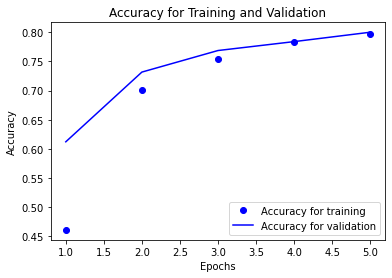

In [10]:
# plotting accuracy graph
acc_plot(base_hist.history['accuracy'], base_hist.history['val_accuracy'])

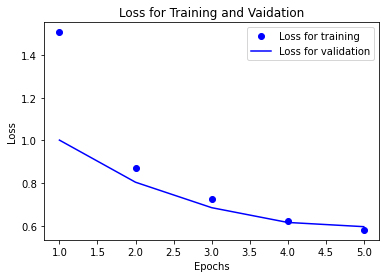

In [11]:
# plotting loss graph
loss_plot(base_hist.history['loss'], base_hist.history['val_loss'])

In [12]:
# evaluate accuracy of the model
base_Model.evaluate(validation_ds)

79/79 [==============================] - 0s 4ms/step - loss: 0.5971 - accuracy: 0.8001


[0.5970736145973206, 0.8001000285148621]

Therefore, we can see that the accuracy for the model is at 0.3435, a value higher than the baseline of 0.1. Hence, the model achieves statistical power and the two hypothesis that I made in the introduction are valid. Thus, I can continue working on this dataset.

## Scaling up: Developing a model that overfits

Next, I will develop a model that overfits by making layers bigger, adding layers or by training for more epochs. Overfitting occurs when the model performance for validation data decreases.

In [13]:
overfitted_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(124,activation='relu'),
  tf.keras.layers.Dense(80,activation='relu'),
  tf.keras.layers.Dense(24, activation='softmax')
])

overfitted_model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

overfit_hist = overfitted_model.fit(
    training_ds,
    epochs = 10,
    validation_data = training_ds,
)

Epoch 1/10
454/454 [==============================] - 5s 8ms/step - loss: 0.6125 - accuracy: 0.7923 - val_loss: 0.4335 - val_accuracy: 0.8432
Epoch 2/10
454/454 [==============================] - 4s 9ms/step - loss: 0.4037 - accuracy: 0.8563 - val_loss: 0.3625 - val_accuracy: 0.8689
Epoch 3/10
454/454 [==============================] - 3s 6ms/step - loss: 0.3596 - accuracy: 0.8679 - val_loss: 0.3411 - val_accuracy: 0.8736
Epoch 4/10
454/454 [==============================] - 3s 7ms/step - loss: 0.3340 - accuracy: 0.8779 - val_loss: 0.3262 - val_accuracy: 0.8798
Epoch 5/10
454/454 [==============================] - 4s 8ms/step - loss: 0.3145 - accuracy: 0.8846 - val_loss: 0.2934 - val_accuracy: 0.8906
Epoch 6/10
454/454 [==============================] - 4s 8ms/step - loss: 0.3009 - accuracy: 0.8894 - val_loss: 0.2896 - val_accuracy: 0.8931
Epoch 7/10
454/454 [==============================] - 4s 9ms/step - loss: 0.2899 - accuracy: 0.8931 - val_loss: 0.2824 - val_accuracy: 0.8949
Epoch 

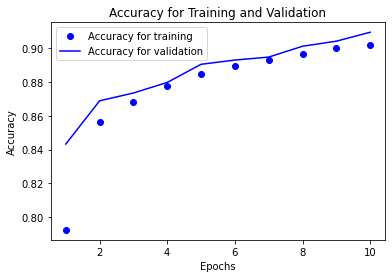

In [14]:
acc_plot(overfit_hist.history['accuracy'], overfit_hist.history['val_accuracy'])

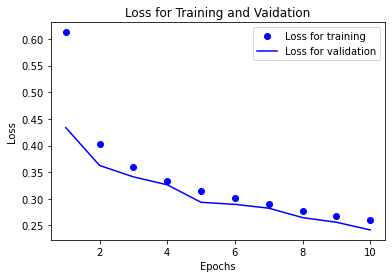

In [15]:
loss_plot(overfit_hist.history['loss'], overfit_hist.history['val_loss'])

As shown in the graphs above, this model overfits as the model evaluation accuracy begins to degrade or decrease at week 5 and possibly 7.

In the following steps, I will use trial and error to find a model with the best performance. This means that the model should not overfit like the previous model, yet achieve the highest accuracy possible . 

## Regularizing your model and tuning your hyperparameters
In the following steps, I will repeatedly add modifications to my model to train it and evaluate the validation data to achive the highest accuracy I can attain.

#### First model

For the first model, I changed the optimizer to rmsprop, and added an activity regularizer to one of the layers, known as the L1 regularizer. Also, I reduced the epoch size down to 6 since the previous model overfitted at around the 7th epoch.

In [16]:
first_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(40,activation='relu'),
  tf.keras.layers.Dense(24, activity_regularizer=tf.keras.regularizers.L1(0.01), activation='relu'),
  tf.keras.layers.Dense(20, activation='softmax')
])

first_model.compile(
    optimizer = 'rmsprop',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

first_hist = first_model.fit(
    training_ds,
    epochs = 6,
    validation_data = training_ds,
)

Epoch 1/6
454/454 [==============================] - 4s 7ms/step - loss: 0.8944 - accuracy: 0.7748 - val_loss: 0.7100 - val_accuracy: 0.7981
Epoch 2/6
454/454 [==============================] - 3s 6ms/step - loss: 0.5643 - accuracy: 0.8434 - val_loss: 0.5328 - val_accuracy: 0.8534
Epoch 3/6
454/454 [==============================] - 3s 6ms/step - loss: 0.4968 - accuracy: 0.8559 - val_loss: 0.4859 - val_accuracy: 0.8605
Epoch 4/6
454/454 [==============================] - 3s 7ms/step - loss: 0.4571 - accuracy: 0.8667 - val_loss: 0.4333 - val_accuracy: 0.8730
Epoch 5/6
454/454 [==============================] - 3s 7ms/step - loss: 0.4305 - accuracy: 0.8725 - val_loss: 0.4317 - val_accuracy: 0.8740
Epoch 6/6
454/454 [==============================] - 3s 7ms/step - loss: 0.4099 - accuracy: 0.8771 - val_loss: 0.4253 - val_accuracy: 0.8748


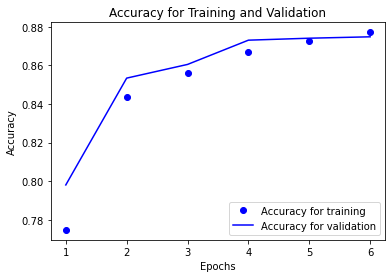

In [17]:
acc_plot(first_hist.history['accuracy'], first_hist.history['val_accuracy'])

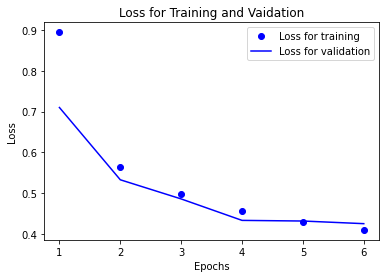

In [18]:
loss_plot(first_hist.history['loss'], first_hist.history['val_loss'])

This caused a huge modification to the model and the model overfits by a lot.

#### Second model
For this model, I decided to modify my layers and add a dropout layer.

In [19]:
sec_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(20, activity_regularizer=tf.keras.regularizers.L1(0.01), activation='relu'),
  tf.keras.layers.Dense(40, activation='relu'),
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(16, activation='softmax')
])

sec_model.compile(
    optimizer = 'rmsprop',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

sec_hist = sec_model.fit(
    training_ds,
    epochs = 6,
    validation_data = training_ds,
)

Epoch 1/6
454/454 [==============================] - 5s 7ms/step - loss: 1.1971 - accuracy: 0.6288 - val_loss: 0.6350 - val_accuracy: 0.8052
Epoch 2/6
454/454 [==============================] - 3s 7ms/step - loss: 0.7329 - accuracy: 0.7729 - val_loss: 0.5046 - val_accuracy: 0.8464
Epoch 3/6
454/454 [==============================] - 3s 6ms/step - loss: 0.6343 - accuracy: 0.8074 - val_loss: 0.4673 - val_accuracy: 0.8543
Epoch 4/6
454/454 [==============================] - 3s 7ms/step - loss: 0.5860 - accuracy: 0.8215 - val_loss: 0.4597 - val_accuracy: 0.8517
Epoch 5/6
454/454 [==============================] - 4s 8ms/step - loss: 0.5565 - accuracy: 0.8321 - val_loss: 0.4599 - val_accuracy: 0.8504
Epoch 6/6
454/454 [==============================] - 4s 9ms/step - loss: 0.5320 - accuracy: 0.8358 - val_loss: 0.4176 - val_accuracy: 0.8620


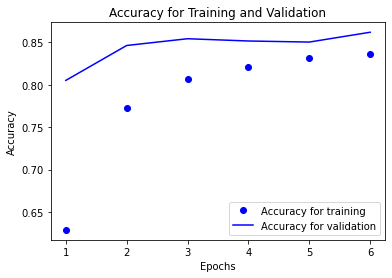

In [20]:
acc_plot(sec_hist.history['accuracy'], sec_hist.history['val_accuracy'])

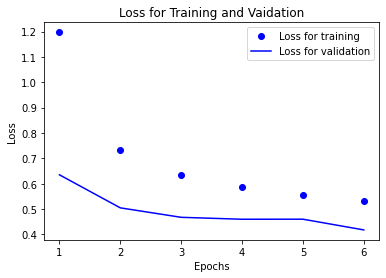

In [21]:
loss_plot(sec_hist.history['loss'], sec_hist.history['val_loss'])

For the second model, the validation accuracy decreases at some epochs and thus it overfits. This model is not ideal either.

#### Third model
For my third try, I reduced the value for the dropout layer and and for other layers as well. I decided to try and change the optimizer back to its original.

In [22]:
third_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(12, activity_regularizer=tf.keras.regularizers.L1(0.01), activation='relu'),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(12, activation='softmax')
])

third_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

third_hist = third_model.fit(
    training_ds,
    epochs = 6,
    validation_data = testing_ds,
)

Epoch 1/6
454/454 [==============================] - 2s 4ms/step - loss: 1.7679 - accuracy: 0.3889 - val_loss: 1.0859 - val_accuracy: 0.6700
Epoch 2/6
454/454 [==============================] - 2s 4ms/step - loss: 1.2200 - accuracy: 0.5690 - val_loss: 0.8507 - val_accuracy: 0.7343
Epoch 3/6
454/454 [==============================] - 3s 6ms/step - loss: 1.0676 - accuracy: 0.6160 - val_loss: 0.7578 - val_accuracy: 0.7472
Epoch 4/6
454/454 [==============================] - 2s 4ms/step - loss: 0.9862 - accuracy: 0.6333 - val_loss: 0.7091 - val_accuracy: 0.7434
Epoch 5/6
454/454 [==============================] - 2s 4ms/step - loss: 0.9319 - accuracy: 0.6528 - val_loss: 0.6771 - val_accuracy: 0.7567
Epoch 6/6
454/454 [==============================] - 2s 3ms/step - loss: 0.8976 - accuracy: 0.6648 - val_loss: 0.6483 - val_accuracy: 0.7688


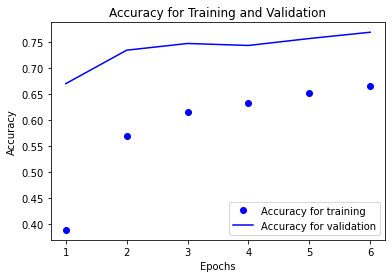

In [23]:
acc_plot(third_hist.history['accuracy'], third_hist.history['val_accuracy'])

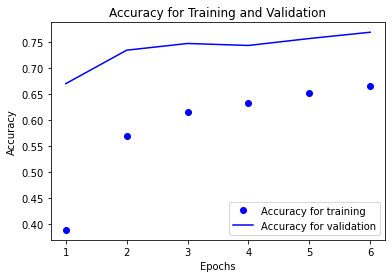

In [24]:
acc_plot(third_hist.history['accuracy'], third_hist.history['val_accuracy'])

The graph does not show any overfitting, however the accuracy for training can be improved to be more accurate still.

#### Fourth model
In this attempt, I reduced the dropout value once more and increased the values of the other layers.

In [25]:
fourth_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(20, activity_regularizer=tf.keras.regularizers.L1(0.01), activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(20, activation='softmax')
])

fourth_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

fourth_hist = fourth_model.fit(
    training_ds,
    epochs = 9,
    validation_data = testing_ds,
)

Epoch 1/9
454/454 [==============================] - 2s 4ms/step - loss: 1.6412 - accuracy: 0.5050 - val_loss: 0.8699 - val_accuracy: 0.7657
Epoch 2/9
454/454 [==============================] - 2s 5ms/step - loss: 0.8979 - accuracy: 0.7341 - val_loss: 0.6617 - val_accuracy: 0.8109
Epoch 3/9
454/454 [==============================] - 2s 5ms/step - loss: 0.7241 - accuracy: 0.7868 - val_loss: 0.5824 - val_accuracy: 0.8284
Epoch 4/9
454/454 [==============================] - 2s 4ms/step - loss: 0.6453 - accuracy: 0.8109 - val_loss: 0.5448 - val_accuracy: 0.8348
Epoch 5/9
454/454 [==============================] - 2s 4ms/step - loss: 0.5958 - accuracy: 0.8228 - val_loss: 0.5128 - val_accuracy: 0.8442
Epoch 6/9
454/454 [==============================] - 2s 4ms/step - loss: 0.5602 - accuracy: 0.8328 - val_loss: 0.4926 - val_accuracy: 0.8484
Epoch 7/9
454/454 [==============================] - 2s 4ms/step - loss: 0.5364 - accuracy: 0.8408 - val_loss: 0.4810 - val_accuracy: 0.8503
Epoch 8/9
454

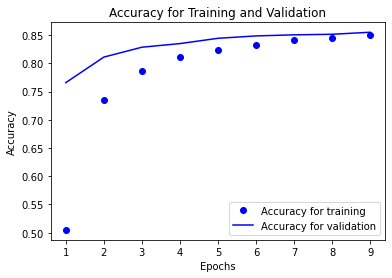

In [26]:
acc_plot(fourth_hist.history['accuracy'], fourth_hist.history['val_accuracy'])

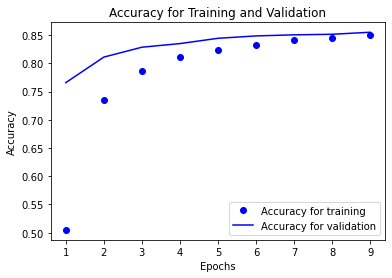

In [27]:
acc_plot(fourth_hist.history['accuracy'], fourth_hist.history['val_accuracy'])

This is the best fit graph so far. There is no overfitting and the accuracy for training and validation is more similar.

In [29]:
fourth_model.evaluate(validation_ds)

79/79 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.8549


[0.4630977511405945, 0.8549000024795532]

## Conclusion

In this project, the best performing model that I was able to train was the fourth model. With it, I was able to attain 0.8549 accuracy and therefore a high measure of success. The process took a long time as there are an infinite amount of tweaks that can be made and the models overfit easily as well. 

Personally, I found that adding dropout and L1 regularizers were more effective then making changes to the size and number of layers. They helped to significantly increase the accuracy of my models. However, I understand that there are many other effective ways to increase accuracy that I could implement in further developments in the future.

## References

Tensor Flow dataset
https://www.tensorflow.org/datasets/keras_example

Fashion_mnist
https://www.tensorflow.org/datasets/catalog/fashion_mnist

@article{DBLP:journals/corr/abs-1708-07747,

  author    = {Han Xiao and Kashif Rasul and Roland Vollgraf},
               
  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms},
  
  journal   = {CoRR},
  
  volume    = {abs/1708.07747},
  
  year      = {2017},
  
  url       = {http://arxiv.org/abs/1708.07747},
  
  archivePrefix = {arXiv},
  
  eprint    = {1708.07747},
  
  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
  
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
  
  bibsource = {dblp computer science bibliography, https://dblp.org}